# Load dataset

In [1]:
import pandas as pd
df_text = pd.read_csv('datasets/ps5_tweets_text.csv', index_col=0)
df_label = pd.read_csv('datasets/ps5_tweets_labels_as_numbers.csv', index_col=0)

In [2]:
df_text.head()

,Tweet
Id,
0,https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Ple...
1,@mygovindia Today just after a week of lockdow...
2,Tuskys partners with Amref to provide on groun...
3,@chrissyteigen are u doing ur own grocery shop...
4,UK Critical Care Nurse Cries at Empty SuperMar...


In [3]:
df_text['Tweet'][0]

'https://t.co/UpjxfOgQs8\r\r\n\r\r\nGaisss! Please read this,and please limit yourself to go outside and please,please..always wash your hands,always use the hand sanitizer. \r\r\n\r\r\nAnd please get ready to stock up the food.'

In [4]:
# Cleaning df_text dataset
import re
clean_tweets = []
for tweet in df_text['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
#     tweet = re.sub('&lt;/?[a-z]+&gt;', '', tweet) 
    tweet = re.sub('&amp;', 'and', tweet) # Replace &amp; with and
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
#     tweet = re.sub("!@#$%^&*()[]{};:,./<>?\|`~-=_+", "", tweet)
    tweet = re.sub("/t", "", tweet)
    tweet = re.sub("-", "", tweet)
    tweet = re.sub(":", "", tweet)
    tweet = re.sub("!", "", tweet)
    tweet = re.sub("[0-9]", "", tweet)
#     tweet = tweet.replace("*", "")
    tweet = re.sub("[A-Za-z0-9]+\*+[A-Za-z0-9]+", "", tweet) # Delete words like F**k
    tweet = tweet.replace("(", "")
    tweet = tweet.replace(")", "")
    tweet = tweet.replace(".", "")
    tweet = tweet.replace("?", "")
    tweet = tweet.replace("  ", " ")
    tweet = tweet.replace(",", "")
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    ##Here's where all the cleaning takes place
    clean_tweets.append(tweet)
    
df_text['Tweet'] = clean_tweets

In [5]:
clean_tweets[5]

"Makes my heart ache its the elderly that won't make it through the disease either and people want yo starve them too and force them out every day to expose themselves more and more because they can't bulk buy selfish stopthepeak stayhome"

In [6]:
df_text['Tweet'][1]

'Today just after a week of lockdown lot of confectionary stores are running out of stock how will be the seen if lockdown increased because of COVID community spread specially in B and C class city Emergency Supply chain need to be pla'

In [7]:
df_label.head()

,Label
Id,
0,4
1,1
2,2
3,1
4,0


In [8]:
# Check whether this dataset has missing data 

In [9]:
df_text.shape

(37041, 1)

In [10]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37041 entries, 0 to 37040
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   37041 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [11]:
df_label['Label'].unique()

array([4, 1, 2, 0, 3])

In [17]:
# Do not have missing data

# Naive Bayes

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/taoran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df_text["Tweet"][0]

'Gaisss Please read thisand please limit yourself to go outside and pleasepleasealways wash your handsalways use the hand sanitizer And please get ready to stock up the food'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df_text["Tweet"])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_label['Label'], test_size=0.3, random_state=1)

In [16]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

In [17]:
# Define a new evalation function
def log_eva(X, y, M):
    """M means the model used"""
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
    
    pred_y = M.predict(X)
    
#     # Calculate accuracy
#     print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(M.score(X, y)))
    
    # Calculate confusion matrix
    c_mat = confusion_matrix(y, pred_y)
    print('Confusion matrix is')
    print(c_mat)
    
    # Compute precision score
    print("Precision score is:{}".format(precision_score(y, pred_y, average='micro')))
    
    # Compute recall score
    print("Recall score is:{}".format(recall_score(y, pred_y, average='micro')))
    
    # Compute f1 score
    print("F1 score is:{}".format(f1_score(y, pred_y, average='micro')))

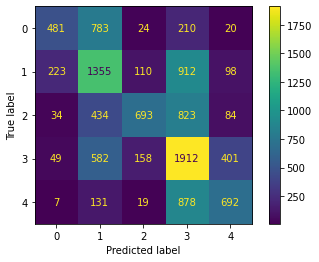

In [17]:
from sklearn.metrics import plot_confusion_matrix
# import matplotlib.pyplot as plt
plot_confusion_matrix(clf, X_test, y_test)

In [18]:
log_eva(X_test, y_test, clf)

Confusion matrix is
[[ 481  783   24  210   20]
 [ 223 1355  110  912   98]
 [  34  434  693  823   84]
 [  49  582  158 1912  401]
 [   7  131   19  878  692]]
Precision score is:0.46189147844866374
Recall score is:0.46189147844866374
F1 score is:0.46189147844866374


# A simple neural network

In [11]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
Y = df_label['Label'].tolist()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
from keras.utils import np_utils
dummy_y = np_utils.to_categorical(encoded_Y)

In [13]:
dummy_y

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [16]:
from sklearn.model_selection import train_test_split
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    df_text['Tweet'], dummy_y, test_size=0.3, random_state=1)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# This tokenizer can only fit on training dataset, otherwise, it will leak the information of the testing dataset
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# This could be done on both training and testing dataset
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [24]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [26]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_split=0.3, verbose=2, callbacks=[callback])

Epoch 1/30
568/568 - 2s - loss: 1.5554 - accuracy: 0.2837 - val_loss: 1.5068 - val_accuracy: 0.3207
Epoch 2/30
568/568 - 2s - loss: 1.4630 - accuracy: 0.3371 - val_loss: 1.4284 - val_accuracy: 0.3656
Epoch 3/30
568/568 - 1s - loss: 1.3349 - accuracy: 0.4417 - val_loss: 1.2957 - val_accuracy: 0.4675
Epoch 4/30
568/568 - 2s - loss: 1.1444 - accuracy: 0.5448 - val_loss: 1.1675 - val_accuracy: 0.5142
Epoch 5/30
568/568 - 1s - loss: 0.9883 - accuracy: 0.6167 - val_loss: 1.0924 - val_accuracy: 0.5550
Epoch 6/30
568/568 - 2s - loss: 0.8675 - accuracy: 0.6761 - val_loss: 1.0379 - val_accuracy: 0.5862
Epoch 7/30
568/568 - 1s - loss: 0.7728 - accuracy: 0.7193 - val_loss: 1.0053 - val_accuracy: 0.6033
Epoch 8/30
568/568 - 1s - loss: 0.6949 - accuracy: 0.7557 - val_loss: 0.9897 - val_accuracy: 0.6089
Epoch 9/30
568/568 - 1s - loss: 0.6310 - accuracy: 0.7829 - val_loss: 0.9935 - val_accuracy: 0.6155
Epoch 10/30
568/568 - 1s - loss: 0.5755 - accuracy: 0.8051 - val_loss: 0.9938 - val_accuracy: 0.6192

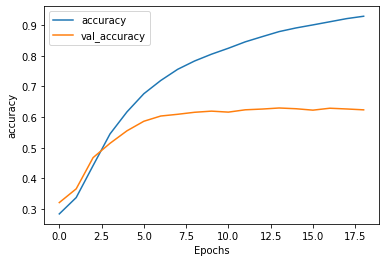

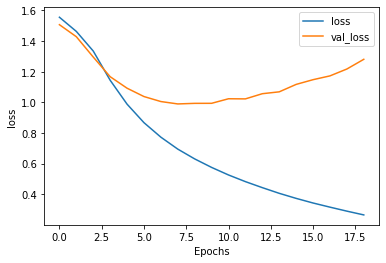

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [91]:
# Define a new evalation function
def log_eva(X, y, M):
    """M means the model used"""
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
    
    
    pred_y = M.predict(X)
    pred_y = np.argmax(pred_y, axis=1)
    y = np.argmax(y, axis=1)
    # Calculate accuracy
#     print('Accuracy of the classifier on test set: {:.2f}'.format(M.accuracy_score(y, pred_y)))
    
    # Calculate confusion matrix
    c_mat = confusion_matrix(y, pred_y)
    print('Confusion matrix is')
    print(c_mat)
    
    # Compute precision score
    print("Micro Precision score is:{}".format(precision_score(y, pred_y, average='micro')))
    
    # Compute recall score
    print("Micro Recall score is:{}".format(recall_score(y, pred_y, average='micro')))
    
    # Compute f1 score
    print("Micro F1 score is:{}".format(f1_score(y, pred_y, average='micro')))

In [92]:
log_eva(testing_padded, testing_labels, model)

Confusion matrix is
[[ 882  541   34   40   21]
 [ 222 1798  285  355   38]
 [  13  395 1297  344   19]
 [  42  500  283 1982  295]
 [   3   32   24  600 1068]]
Micro Precision score is:0.6323225051741204
Micro Recall score is:0.6323225051741204
Micro F1 score is:0.6323225051741204


# Kaggle

In [79]:
# load dataset
df_kaggle = pd.read_csv('datasets/ps5_tweets_text_for_the_kaggle_competition.csv')

In [82]:
# Cleaning df_kaggle dataset
import re
clean_tweets = []
for tweet in df_kaggle['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
#     tweet = re.sub('&lt;/?[a-z]+&gt;', '', tweet) 
    tweet = re.sub('&amp;', 'and', tweet) # Replace &amp; with and
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
#     tweet = re.sub("!@#$%^&*()[]{};:,./<>?\|`~-=_+", "", tweet)
    tweet = re.sub("/t", "", tweet)
    tweet = re.sub("-", "", tweet)
    tweet = re.sub(":", "", tweet)
    tweet = re.sub("!", "", tweet)
    tweet = re.sub("[0-9]", "", tweet)
#     tweet = tweet.replace("*", "")
    tweet = re.sub("[A-Za-z0-9]+\*+[A-Za-z0-9]+", "", tweet) # Delete words like F**k
    tweet = tweet.replace("(", "")
    tweet = tweet.replace(")", "")
    tweet = tweet.replace(".", "")
    tweet = tweet.replace("?", "")
    tweet = tweet.replace("  ", " ")
    tweet = tweet.replace(",", "")
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    ##Here's where all the cleaning takes place
    clean_tweets.append(tweet)

In [83]:
sequences = tokenizer.texts_to_sequences(clean_tweets)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predict = model.predict(padded)
predict = np.argmax(predict, axis=1)
predict

array([1, 4, 4, ..., 2, 0, 4])

In [84]:
import csv
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Predicted"])
    
    i = 0
    for ele in predict:
        
        writer.writerow([i, ele])
        
        i += 1